In [194]:
%matplotlib inline
import numpy as np
import random as r
import matplotlib.pyplot as plt
import torch
plt.rcParams["figure.figsize"] = (15, 10)

Validation Loss:  0.45003825906649625
Training Loss:  0.4491295711631976
Epochs:  500
True Theta:  [7.529974597441502, 4.871968066984383]
Analytic Solution:  [7.87365    4.83647761]
Theta with learning rate  0.005 :  [7.791474300846367, 4.8442548353183925]


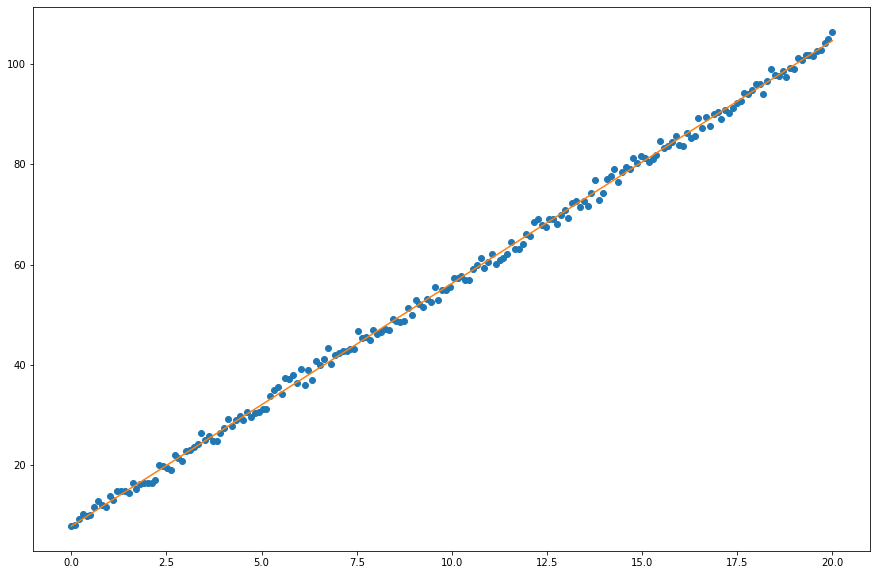

In [208]:
class LinearRegression:

    def __init__(self):
        self.theta = None
        self.theta_grad = None
        self.training_loss_vals = None
        self.validation_loss_vals = None
        
    def getTheta(self):
        return self.theta
    
    def getValidationLoss(self):
        return self.validation_loss_vals
    
    def getTrainingLoss(self):
        return self.training_loss_vals

    def fit(self, X, y):
        n = X.size
        X_ = np.c_[np.ones([n, 1]), X]
        return np.linalg.pinv(X_.T.dot(X_)).dot(X_.T).dot(y)

    def predict(self, X):
        n = len(X)
        X_ = np.c_[np.ones([n, 1]), X]
        return X_.dot(self.theta)
    
    def fit_grad(self, X, y, learning_rate, batch_size, max_epochs, init_theta):
        
        # function for generating an epoch
        def generateEpoch(X, y, batch_size):
            indices = np.arange(0, len(X))
            r.shuffle(indices)
            epoch = []
            for i in range(0, len(X), batch_size):
                epoch.append([X[indices[i:i+batch_size]], y[indices[i:i+batch_size]]])
            return epoch
        
        # shuffling indices for X and y pairs
        indices = np.arange(0, len(X))
        r.shuffle(indices)
        
        # setting validation set equal to a random sample of the size of a batch
        validation_X = np.c_[np.ones([batch_size, 1]), X[indices[0:batch_size]]] 
        validation_y = y[indices[0:batch_size]]
        
        # setting the training set equal to the values that are not a part of the validation set
        X = X[indices[batch_size:]]
        y = y[indices[batch_size:]]
        
        n = X.size
        X_ = np.c_[np.ones([n, 1]), X]
        
        self.theta = init_theta
        self.validation_loss_vals = [sum(((validation_X.dot(self.theta) - validation_y)**2)/2) / len(validation_X)]
        self.training_loss_vals = []
        
        epoch_count = 0
        while epoch_count < max_epochs and self.validation_loss_vals[-1] > 0.1:
            epoch_count += 1
            epoch = generateEpoch(X_, y, batch_size)
            for batch in epoch:
                x_ = batch[0]
                y_ = batch[1]
                self.training_loss_vals.append(sum(((x_.dot(self.theta) - y_)**2)/2) / len(y_))
                self.validation_loss_vals.append(sum(((validation_X.dot(self.theta) - validation_y)**2)/2) / len(validation_X))
                b_grad = sum(x_.dot(self.theta) - y_)
                w_grad = sum((x_[:,1]) * (x_.dot(self.theta) - y_))
                self.theta[0] = self.theta[0] - (learning_rate / len(y_)) * b_grad
                self.theta[1] = self.theta[1] - (learning_rate / len(y_)) * w_grad
                
        print('Validation Loss: ', self.validation_loss_vals[-1])
        print('Training Loss: ', self.training_loss_vals[-1])
        print('Epochs: ', epoch_count)
                
    def predict_grad(self, X):
        n, d = X.shape
        X_ = np.c_[np.ones([n, 1]), X]
        return X_.dot(self.theta_grad)
    
    
true_theta = [np.random.normal(10, 2), np.random.normal(2, 2)]
x = np.linspace(0, 20, 200)
y = (true_theta[1] * x) + true_theta[0]

noise = np.random.normal(0, 1.0, 200)
y = y + noise

learning_rates = [0.005]
for rate in learning_rates:
    model = LinearRegression()
    model.fit_grad(x, y, rate, 20, 500, [1.0, 1.0])
    print('True Theta: ', true_theta)
    print('Analytic Solution: ', model.fit(x, y))
    print('Theta with learning rate ', str(rate),  ': ', model.getTheta())

plt.plot(x, y, 'o')
plt.plot(x, model.predict(x))
plt.show()